In [20]:
import pandas as pd
import matplotlib
%matplotlib inline

In [21]:
df_0 = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_0_5000.csv")
df_1 = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_5000_10000.csv")
df_2 = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_10000_20000.csv")
df_3 = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_20000_30000.csv")
df_4 = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_30000_50000.csv")

df = pd.concat([df_0, df_1, df_2, df_3, df_4])

In [70]:
df.Safe.sum()

36817

# General about generated programs

In the following the def. of a safe program is a program that is compilled without errors and which has no errors or safety violation.

In [57]:
print("Amount of programs: ", df.shape[0])
print("Amount of safe programs: ", df.loc[(df.Errors == "[[], []]") & df.Safe == True].shape[0])

Amount of programs:  50000
Amount of safe programs:  29106


## Program generation time and safety check time

Fastest time:  0.0004470348358154297
Sloweset time:  0.35628104209899897
Average time:  0.00390932131767273


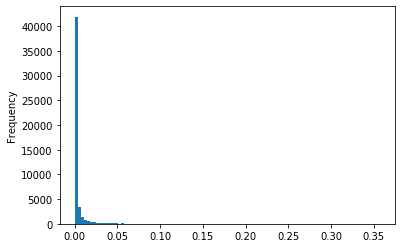

In [23]:
print("Fastest time: ", df.GenerationTime.min())
print("Sloweset time: ", df.GenerationTime.max())
print("Average time: ", df.GenerationTime.mean())
df.GenerationTime.plot.hist(bins=100)

Fastest time:  0.017345905303955078
Sloweset time:  9676.818602085114
Average time:  0.31960534819602965


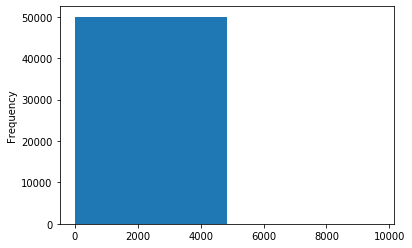

In [24]:
print("Fastest time: ", df.SafetyCheckTime.min())
print("Sloweset time: ", df.SafetyCheckTime.max())
print("Average time: ", df.SafetyCheckTime.mean())
df.SafetyCheckTime.plot.hist(bins=2)

## Program sizes

Smallets size of program:  99
Largest size of program:  16419
Average size of program:  418.0344


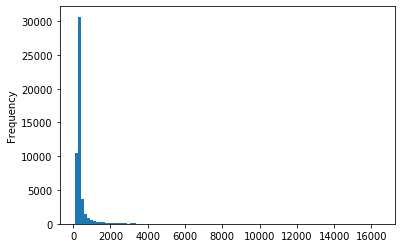

In [25]:
print("Smallets size of program: ", df.Size.min())
print("Largest size of program: ", df.Size.max())
print("Average size of program: ", df.Size.mean())
df.Size.plot.hist(bins=100)

In [26]:
df.reset_index(inplace = True)

In [27]:
df.loc[20000].at["Errors"]
df.at[20000, "Errors"]

'[[], []]'

In [28]:
import base64 

df_errors = df.Errors.values
compiler_error_codes = {}
safety_error_codes = {}

def hasher(s):
    return str(hash(s))[:7]

def get_error_codes(i):
    
    safety_check = i.startswith("[[], ['")
    lists = i.split("['")
    final_list = [[],[]]
    
    if not isinstance(i, list) and i == "[[], []]":
        
        return final_list
    
    for j in range(1, len(lists)):
    
        internal_list = lists[j].split("']")[0]
        error_list = internal_list.split("', '")

        if j == 2 or (j == 1 and safety_check):
            for l in error_list:
                hash_error = hasher(l)
                if hash_error in safety_error_codes:
                    final_list[1].append(hash_error)
                else:
                    safety_error_codes[hash_error] = l
                    final_list[1].append(hash_error)
        else:
            for l in error_list:
                hash_error = hasher(l)
                if hash_error in compiler_error_codes:
                    final_list[0].append(hash_error)
                else:
                    compiler_error_codes[hash_error] = l
                    final_list[0].append(hash_error)
                    
    return final_list

for i in range(0, df.shape[0]):
    result = get_error_codes(df_errors[i])
    df.at[i, "Errors"] = str(result)

## Statsictics

In [47]:
"""
    Compiler errors
"""
amount_of_progeam_without_compiler_errors = 0
for i in df.Errors.values:
    if i.split(",")[1] == " []]":
        amount_of_progeam_without_compiler_errors += 1
print(amount_of_progeam_without_compiler_errors)

39227


In [48]:
"""
    Safetycheck errors
"""
amount_of_progeam_without_safety_errors = 0
for i in df.Errors.values:
    if i.split(",")[0] == "[[]":
        amount_of_progeam_without_safety_errors += 1
print(amount_of_progeam_without_safety_errors)



39652


In [50]:
"""
    Programs with both
"""
total = 0
for i in df.Errors.values:
    if i == "[[], []]":
        total += 1
print(total)

38237


In [63]:
print("avg size of : ", df.loc[(df.Errors.str.startswith("[[], "))].Size.mean())
print("Amount of safe programs: ", df.loc[(df.Errors.str.endswith("[]]"))].Size.mean())
print("Amount of safe programs: ", df.loc[(df.Errors.str[:4] != "[[],")].Size.mean())
print("Amount of safe programs: ", df.loc[(df.Errors.str[-5:] != ", []]")].Size.mean())

Amount of safe programs:  360.03495410067586
Amount of safe programs:  412.5416906400313
Amount of safe programs:  640.2796675686122
Amount of safe programs:  454.47717208734156


## Error analysis

In [41]:
for i in compiler_error_codes:
    if "Fatal" in compiler_error_codes[i]:
        print(i, compiler_error_codes[i],"\n\n")

-675070 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 16 (1-17), variables result and b1 will be merged to v0 


3087347 compilation error in functions main and main at position line 7 from line 16: assembler error Invalid pexpr for word 


3983640 PLEASE REPORT 


-283752 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 14 (1-17), variables result and b1 will be merged to v0 


5793505 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 12 (1-17), variables result and b1 will be merged to v0 


-478325 WARNING: CAN NOT FIND IINFO 1 


-128382 compilation error in functions f0 and f0 at position line 56: linearisation error assign not a word 


-313270 compilation error in functions f0 and f0 at position line 11: assembler error assemble_x86_opn : invalid instruction (check) CMP_64 


-849684 Register allocation: no register bank for type bool 


6757484 compilation error i

5936939 (~ ((RCX.43 - RCX.43) <=u ((8u) 7328))) 


3415958 (ZF.78 && ((((64u) 7941) ^ (((64u) 5654) - RCX.43)) >u RDX.44)) 


-133426 compilation error in functions f0 and f0 at position line 6: assembler error assemble_x86_opn : invalid instruction (check) CMP_64 


-615097 ((((((64u) 5654) - RCX.43) >u RDX.44) && PF.76) && (~ PF.76)) 


-687271 Register allocation at line line 22 from line 192: variable  _8.177 must be allocated to conflicting register ZF.78 


-836848 Register allocation at line line -1: variable  _12.181 must be allocated to conflicting register ZF.78 


-190958 Register allocation at line line 14: variable  _8.145 must be allocated to conflicting register ZF.78 


2413172 Register allocation at line line 23: variable  _7.182 must be allocated to conflicting register ZF.78 


2184647 /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 49 (11-18): typing error: can not implicitly cast U32 into U64 


7081307 /Users/thorjakobsen/GIT/jasmin/comp


8380975 v4.159 :φ=(U64) v4.158; at line -1 


5271550 ( _7.151,  _8.152,  _9.153,  _10.154,  _11.155, v4.156) = NEG_64(v5.145); at 


-219536 line 17 


7105485 Register allocation at line line 11 from line 29: variable  _7.169 must be allocated to conflicting register ZF.78 


5337855 at line line 13: can not allocate v2.132 into RCX.43, the variable is already allocated in RAX.41 


-172741 (~ ((RAX.41 + ((64u) 7584)) >=u ((64u) 6094))) 


-109926 /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 11 (3-43): typing error: can not implicitly cast U16 into U64 


9074594 compilation error in functions main and main at position line 11 from line 18: err arr exp  


3048617 (U64[result.120 1] & 


-178050 ((((v5.118 - ((64u) 8739)) * v2.119) * ((64u) 571)) - v2.119)) and (result#1.125 & 


7145521                                                                    (( 


-823330                                                                     ( 


4226440       

-145765 (~ (((64u) -4333) <u RAX.41)) 


-454757 (~ (((64u) -3925) >u RAX.41)) 


-610711 /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 14 (8-10): typing error: the expression has type U64 instead of int 


-706682 compilation error in functions f0 and f0 at position line 23: linearisation error assign not a word 


-510519 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 126 (13-18), the expression input will not be evaluated to a constant expression, inlining will introduce an assigment 


-573270 Register allocation at line line 39 from line 126: variable ZF.181 must be allocated to conflicting register ZF.78 


-474263 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 32 (13-18), the expression input will not be evaluated to a constant expression, inlining will introduce an assigment 


5767081 compilation error in functions main and main at position line 32: assembler error Not 

4161675 Register allocation at line line 35: variable ZF.163 must be allocated to conflicting register ZF.78 


8375508 Register allocation at line line 18 from line 38: variable  _6.178 must be allocated to conflicting register ZF.78 


-520548 Register allocation at line line 17: variable  _6.148 must be allocated to conflicting register ZF.78 


-684747 Register allocation at line line 12: variable ZF.145 must be allocated to conflicting register ZF.78 


2964372 /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 12 (8-10): typing error: the expression has type U64 instead of int 


-778028 Register allocation at line line 19: variable ZF.143 must be allocated to conflicting register ZF.78 


-441868 Register allocation at line line 17: variable ZF.169 must be allocated to conflicting register ZF.78 


-770388 Register allocation at line line 20: variable  _8.165 must be allocated to conflicting register PF.76 


3215428 Register allocation at line line -1: v

-734483 (~ ((RCX.43 + RAX.41) >=u ((32u) 7279))) 


1109035 (~ ((RDI.48 + RDI.48) >=u ((64u) 7279))) 


-760489 compilation error in functions main and main at position line 7 from line 43: assembler error assemble_x86_opn : invalid instruction (check) CMP_32 


7246444 compilation error in functions main and main at position line 7 from line 23: assembler error assemble_x86_opn : invalid instruction (check) CMP_32 


7041490 Register allocation at line line 11 from line 25: variable result.152 must be allocated to conflicting register SF.77 


9586762 at line line 15: can not allocate v0.95 into RCX.43, the variable is already allocated in RDI.48 


-356832 Register allocation at line line 17: variable  _11.147 must be allocated to conflicting register PF.76 


-871113 (RAX.41 >u (RAX.41 - ((64u) -5413))) 


2878190 ((((- RAX.41) + RAX.41) * (RAX.41 + RAX.41)) <=u 


3839509 (RAX.41 ^ (((RAX.41 * ((8u) 236)) - ((8u) 6294)) - RAX.41)))) 


-689881 (ZF.78 && (RCX.43 >=u (((RAX.41 * ((64

4891392 v5.262 :φ=(U64) v5.259; at line -1 


-702215 v5.265 :φ=(U64) v5.203; at line -1 


7902662 v5.265 :φ=(U64) v5.262; at line -1 


-476938 v5.268 :φ=(U64) v5.203; at line -1 


-620124 ( _3.244,  _4.245,  _5.246,  _6.247,  _7.248, v5.249) = 


-350191   SHR_64(v5.203, ((8u) 1969)); at 


3639544 line 103 


-495525 ( _8.237,  _9.238,  _10.239,  _11.240,  _12.241, v5.242) = 


-911023   IMULr_64(v7.204, v8.205); at 


4806469 line 100 


-610575 Register allocation at line line 22: variable  _4.147 must be allocated to conflicting register SF.77 


-701375 Register allocation at line line 16: variable ZF.164 must be allocated to conflicting register ZF.78 


-362704 Register allocation at line line 25: variable ZF.167 must be allocated to conflicting register ZF.78 


6332642 Register allocation at line line 31: variable  _7.146 must be allocated to conflicting register ZF.78 


-694366 Register allocation at line line -1: variable  _23.215 must be allocated to conflicting regist

In [72]:
for i in safety_error_codes:
    if "Fatal" in safety_error_codes[i]:
        print(i, safety_error_codes[i], "\n\n")

6623961 Fatal error: exception File "src/safety.ml", line 3550, characters 16-22: Assertion failed 


-319090 Fatal error: exception Failure("Environment.dim_of_var: unknown variable in the environment") 


1852444 Fatal error: exception Jasmin.Safety.AbsInterpreter(PW).Binop_not_supported(_) 


6471209 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v3_64_1 in the environment") 


-785323 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v0_64_1 in the environment") 


5487154 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v8_64_1 in the environment") 


1282598 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v7_64_1 in the environment") 


1054439 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v2_64_1 in the environment") 


8532299 Fatal error: exception Failure("Linexpr1.set_coeff: unknown variable ael_v8_32_1 in the environment") 


5070402 Fatal error: exce

In [75]:
df.loc[df.Safe == False]
  3 
  4 export fn f0(reg u64 v0) -> reg u64{
  5     reg bool v4;
  6     reg u64 v7;
  7     _, _, _, _, v4 = #CMP(v0, 42);
  8     if (v4){
  9         v7=2169+8548;
 10     } else {
 11         v7=v7;
 12     }
 13     return v7;
 14 }

,index,Unnamed: 0,Seed,Errors,Size,Safe,GenerationTime,SafetyCheckTime
7,7,7,7,"[['-675070', '3087347', '3983640'], ['-675070']]",365,False,0.001963,0.028465
12,12,12,12,"[[], []]",243,False,0.002650,0.029653
34,34,34,34,"[['-478325', '-128382', '3983640'], []]",1442,False,0.019828,1.832187
36,36,36,36,"[[], []]",945,False,0.008359,0.171373
44,44,44,44,"[[], []]",358,False,0.001643,0.058704
47,47,47,47,"[[], []]",330,False,0.001730,0.029161
49,49,49,49,"[['-313270', '3983640'], []]",326,False,0.003787,0.035121
58,58,58,58,"[['-675070', '3087347', '3983640'], ['-675070']]",391,False,0.001850,0.065635
71,71,71,71,"[[], []]",333,False,0.002106,0.029877
76,76,76,76,"[[], []]",980,False,0.009419,0.401370


# Finding truly safe programs

In [43]:
safe_programs = df.loc[df.Safe == True].Seed

In [44]:
truly_safe_programs = []
for j in safe_programs:
    errors = df.loc[df.Seed == j].Errors.values[0]
    if errors == [[],[]]:
        truly_safe_programs.append(j)
    else: 
        #Check if compilation made errors
        add = True
        for i in errors[0]:
            if "WARNING" not in compiler_error_codes[i]:
                add = False
                break
        for i in errors[1]:
            if "WARNING" not in safety_error_codes[i]:
                add = False
                break
        if add:
            truly_safe_programs.append(j)

import pickle 
pickle.dump(truly_safe_programs, open("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/list_of_secure_programs.p", "wb"))

In [45]:
len(truly_safe_programs)

12428

In [132]:
for i in range(10):
    print(70*i*3,",")

0 ,
210 ,
420 ,
630 ,
840 ,
1050 ,
1260 ,
1470 ,
1680 ,
1890 ,


In [105]:
groups = dict(list(df.groupby("Size")))

In [134]:
everything_below = 70
last_time = 0
for i in range(25):
    current = 0
    out_of = 0
    for j in groups.keys():
        if j >= last_time and j < everything_below:
            out_of += groups[j].shape[0]
            current += groups[j].loc[groups[j].Safe == True].shape[0]
    if out_of == 0:
        out_of = 1
    print("(%d, %f)" % (everything_below, current/out_of))
    everything_below += 70
    last_time += 70

(70, 0.000000)
(140, 0.970767)
(210, 0.867157)
(280, 0.606678)
(350, 0.782450)
(420, 0.710755)
(490, 0.513021)
(560, 0.473567)
(630, 0.453892)
(700, 0.490066)
(770, 0.457557)
(840, 0.478155)
(910, 0.437318)
(980, 0.488449)
(1050, 0.417778)
(1120, 0.476415)
(1190, 0.517647)
(1260, 0.493333)
(1330, 0.467626)
(1400, 0.488889)
(1470, 0.476190)
(1540, 0.505618)
(1610, 0.542553)
(1680, 0.476190)
(1750, 0.475610)


# Side channel analysis

The following seeds in the truly safe list are of intrest:

In [49]:
print(truly_safe_programs[41])
print(truly_safe_programs[42])

30067
30068


In [76]:
side_channel_data = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/generated_data/time_measure_results_0_10000.csv")

In [81]:
time_values = side_channel_data.Total_running_time.values
total_running_time = 0
for i in time_values:
    total_running_time += float(i)
print("Total running time: ", total_running_time/60/60)

Total running time:  25.3087043921815


In [83]:
side_channel_data.Time.max()

2.7000000000000002e-05

In [84]:
side_channel_data.Time.min()

0.0

In [85]:
side_channel_data.Total_running_time.max()

23.15436553955078

In [86]:
side_channel_data

,Unnamed: 0,Seed,Time,Fastest,Slowest,F_input,S_input,Total_running_time
0,0,30000,0.000001,0.000000,0.000001,2661269470,-1871666353,4.660376
1,1,30001,0.000001,0.000000,0.000001,1,-156200196898817,4.102405
2,2,30002,0.000001,0.000000,0.000001,0,35607984658554,5.025022
3,3,30003,0.000001,0.000000,0.000001,1982337577743230966,1,4.646924
4,4,30005,0.000001,0.000000,0.000001,1,-196771,5.757855
5,5,30006,0.000001,0.000000,0.000001,-36700734032869,14503741019,5.787110
6,6,30015,0.000001,0.000000,0.000001,406702121,-97691496898499,4.218399
7,7,30016,0.000001,0.000000,0.000001,-1,13214,4.349247
8,8,30019,0.000001,0.000000,0.000001,0,-87572286372708352,5.777009
9,9,30020,0.000001,0.000000,0.000001,-4050583,-88098766,5.012430
